In [1]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("DATA/Final_data.csv")

In [3]:
X = df.drop(columns=['PRIX'])
y = np.log(df['PRIX'])

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

 # LinearRegression 

In [5]:

from sklearn.linear_model import LinearRegression


# Define the model
model = LinearRegression()

# Define the parameters for grid search
param_grid = { 
    'fit_intercept': [True, False],
    
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Linear Regression: {grid_search.best_params_}")
print(f"Best score for Linear Regression: {grid_search.best_score_}")



Best parameters for Linear Regression: {'fit_intercept': False}
Best score for Linear Regression: 0.7413050664126344


In [6]:
LR_best_model=LinearRegression(fit_intercept=False)
LR_best_model.fit(X_train,y_train)

LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [10]:
#--------------------train set ----------------------------------------
LR_y_pred_default=LR_model.predict(X_train)
LR_mse_default_train = mean_squared_error(y_train, LR_y_pred_default)
LR_r2_default_train = r2_score(y_train, LR_y_pred_default)

LR_y_pred = LR_best_model.predict(X_train)
LR_mse_train = mean_squared_error(y_train, LR_y_pred)
LR_r2_train = r2_score(y_train, LR_y_pred)

#--------------------test set ----------------------------------------
LR_y_pred_default=LR_model.predict(X_test)
LR_mse_default = mean_squared_error(y_test, LR_y_pred_default)
LR_r2_default = r2_score(y_test, LR_y_pred_default)

LR_y_pred = LR_best_model.predict(X_test)
LR_mse = mean_squared_error(y_test, LR_y_pred)
LR_r2 = r2_score(y_test, LR_y_pred)

In [12]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {LR_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {LR_mse_default_train:.2f}")

print(f"R-squared score: {LR_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {LR_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {LR_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {LR_mse_default:.2f}")

print(f"R-squared score: {LR_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {LR_mse:.2f}")

Training scores
R-squared  default score: 0.76
mse dfault for DecisionTreeRegressor: 0.10
R-squared score: 0.76
Error for DecisionTreeRegressor: 0.10
_______________________________________

Testing scores
R-squared  default score: 0.72
mse dfault for DecisionTreeRegressor: 0.11
R-squared score: 0.72
mse for DecisionTreeRegressor: 0.11


# Dicision Tree

In [13]:
model = DecisionTreeRegressor()

# Define the parameters for grid search
param_grid = { 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for DecisionTreeRegressor: {grid_search.best_params_}")
print(f"Best score for DecisionTreeRegressor: {grid_search.best_score_}")




Best parameters for DecisionTreeRegressor: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for DecisionTreeRegressor: 0.7900244472816056


Train two models, one with the best parametres and onather one with default parametr and compare results

In [14]:
DT_best_model=DecisionTreeRegressor(max_depth= 10, min_samples_leaf=2,min_samples_split=10)
DT_best_model.fit(X_train,y_train)

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [15]:
#--------------------train set ----------------------------------------
DT_y_pred_default=DT_model.predict(X_train)
DT_mse_default_train = mean_squared_error(y_train, DT_y_pred_default)
DT_r2_default_train = r2_score(y_train, DT_y_pred_default)

DT_y_pred = DT_best_model.predict(X_train)
DT_mse_train = mean_squared_error(y_train, DT_y_pred)
DT_r2_train = r2_score(y_train, DT_y_pred)

#--------------------test set ----------------------------------------
DT_y_pred_default=DT_model.predict(X_test)
DT_mse_default = mean_squared_error(y_test, DT_y_pred_default)
DT_r2_default = r2_score(y_test, DT_y_pred_default)

DT_y_pred = DT_best_model.predict(X_test)
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_r2 = r2_score(y_test, DT_y_pred)


In [16]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {DT_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {DT_mse_default_train:.2f}")

print(f"R-squared score: {DT_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {DT_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {DT_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {DT_mse_default:.2f}")

print(f"R-squared score: {DT_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {DT_mse:.2f}")


Training scores
R-squared  default score: 0.99
mse dfault for DecisionTreeRegressor: 0.00
R-squared score: 0.89
Error for DecisionTreeRegressor: 0.04
_______________________________________

Testing scores
R-squared  default score: 0.72
mse dfault for DecisionTreeRegressor: 0.11
R-squared score: 0.73
mse for DecisionTreeRegressor: 0.11


## RandomForestRegressor

In [17]:

model = RandomForestRegressor()

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30] }

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for RandomForestRegressor: {grid_search.best_params_}")
print(f"Best score for RandomForestRegressor: {grid_search.best_score_}")



Best parameters for RandomForestRegressor: {'max_depth': 20, 'n_estimators': 100}
Best score for RandomForestRegressor: 0.8462450847684055


In [18]:
RF_best_model=RandomForestRegressor(max_depth= 20, n_estimators=100)
RF_best_model.fit(X_train,y_train)

RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
#--------------------train set ----------------------------------------
RF_y_pred_default=RF_model.predict(X_train)
RF_mse_default_train = mean_squared_error(y_train, RF_y_pred_default)
RF_r2_default_train = r2_score(y_train, RF_y_pred_default)

RF_y_pred = RF_best_model.predict(X_train)
RF_mse_train = mean_squared_error(y_train, RF_y_pred)
RF_r2_train = r2_score(y_train, RF_y_pred)

#--------------------test set ----------------------------------------
RF_y_pred_default=RF_model.predict(X_test)
RF_mse_default = mean_squared_error(y_test, RF_y_pred_default)
RF_r2_default = r2_score(y_test, RF_y_pred_default)

RF_y_pred = RF_best_model.predict(X_test)
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_r2 = r2_score(y_test, RF_y_pred)


In [21]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {RF_r2_default_train}")
print(f"mse dfault for DecisionTreeRegressor: {RF_mse_default_train}")

print(f"R-squared score: {RF_r2_train}")
print(f"Error for DecisionTreeRegressor: {RF_mse_train}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {RF_r2_default}")
print(f"mse dfault for DecisionTreeRegressor: {RF_mse_default}")

print(f"R-squared score: {RF_r2}")
print(f"mse for DecisionTreeRegressor: {RF_mse}")

Training scores
R-squared  default score: 0.973145501284371
mse dfault for DecisionTreeRegressor: 0.011096659766195005
R-squared score: 0.9740218618647862
Error for DecisionTreeRegressor: 0.010734535144307627
_______________________________________

Testing scores
R-squared  default score: 0.8291582800277342
mse dfault for DecisionTreeRegressor: 0.06829384360666207
R-squared score: 0.8254429738464828
mse for DecisionTreeRegressor: 0.06977903433954885


# ElasticNet

In [22]:
model = ElasticNet()

param_grid = { 'alpha': [0.1, 0.5, 1, 2, 5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters for ElasticNet: {grid_search.best_params_}")
print(f"Best score for ElasticNet: {grid_search.best_score_}")



Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.1}
Best score for ElasticNet: 0.6691849018104072


In [23]:
EN_best_model=ElasticNet(alpha=0.1, l1_ratio= 0.1)
EN_best_model.fit(X_train,y_train)

EN_model = ElasticNet()
EN_model.fit(X_train,y_train)

ElasticNet()

In [24]:
#--------------------train set ----------------------------------------
EN_y_pred_default=EN_model.predict(X_train)
EN_mse_default_train = mean_squared_error(y_train, EN_y_pred_default)
EN_r2_default_train = r2_score(y_train, EN_y_pred_default)

EN_y_pred = EN_best_model.predict(X_train)
EN_mse_train = mean_squared_error(y_train, EN_y_pred)
EN_r2_train = r2_score(y_train, EN_y_pred)

#--------------------test set ----------------------------------------
EN_y_pred_default=EN_model.predict(X_test)
EN_mse_default = mean_squared_error(y_test, EN_y_pred_default)
EN_r2_default = r2_score(y_test, EN_y_pred_default)

EN_y_pred = EN_best_model.predict(X_test)
EN_mse = mean_squared_error(y_test, EN_y_pred)
EN_r2 = r2_score(y_test, EN_y_pred)

In [25]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {EN_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {EN_mse_default_train:.2f}")

print(f"R-squared score: {EN_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {EN_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {EN_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {EN_mse_default:.2f}")

print(f"R-squared score: {EN_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {EN_mse:.2f}")

Training scores
R-squared  default score: 0.44
mse dfault for DecisionTreeRegressor: 0.23
R-squared score: 0.68
Error for DecisionTreeRegressor: 0.13
_______________________________________

Testing scores
R-squared  default score: 0.44
mse dfault for DecisionTreeRegressor: 0.22
R-squared score: 0.66
mse for DecisionTreeRegressor: 0.14


# XGBRegressor

In [26]:
model = XGBRegressor()

# Define the parameters for grid search
param_grid = { 
    'objective': ['reg:squarederror'],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'alpha': [5, 10, 15],
    'n_estimators': [10, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for XGBoost: {grid_search.best_params_}")
print(f"Best score for XGBoost: {grid_search.best_score_}")


Best parameters for XGBoost: {'alpha': 5, 'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 50, 'objective': 'reg:squarederror'}
Best score for XGBoost: 0.8243375170080623


In [27]:
xgb_best_model=XGBRegressor(alpha=5,colsample_bytree=0.7,learning_rate=0.2, max_depth=15, n_estimators=50, objective= 'reg:squarederror')
xgb_best_model.fit(X_train,y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
#--------------------train set ----------------------------------------
xgb_y_pred_default=xgb_model.predict(X_train)
xgb_mse_default_train = mean_squared_error(y_train, xgb_y_pred_default)
xgb_r2_default_train = r2_score(y_train, xgb_y_pred_default)

xgb_y_pred = xgb_best_model.predict(X_train)
xgb_mse_train = mean_squared_error(y_train, xgb_y_pred)
xgb_r2_train = r2_score(y_train, xgb_y_pred)

#--------------------test set ----------------------------------------
xgb_y_pred_default=xgb_model.predict(X_test)
xgb_mse_default = mean_squared_error(y_test, xgb_y_pred_default)
xgb_r2_default = r2_score(y_test, xgb_y_pred_default)

xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

In [29]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {xgb_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {xgb_mse_default_train:.2f}")

print(f"R-squared score: {xgb_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {xgb_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {xgb_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {xgb_mse_default:.2f}")

print(f"R-squared score: {xgb_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {xgb_mse:.2f}")

Training scores
R-squared  default score: 0.98
mse dfault for DecisionTreeRegressor: 0.01
R-squared score: 0.88
Error for DecisionTreeRegressor: 0.05
_______________________________________

Testing scores
R-squared  default score: 0.85
mse dfault for DecisionTreeRegressor: 0.06
R-squared score: 0.83
mse for DecisionTreeRegressor: 0.07


# GradientBoostingRegressor

In [30]:

model = GradientBoostingRegressor()

# Define the parameters for grid search
param_grid = { 
    'learning_rate': [0.01, 0.1, 0.8],
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")
print(f"Best score for Gradient Boosting: {grid_search.best_score_}")



Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for Gradient Boosting: 0.8589558655279884


In [31]:
gradianB_best_model=GradientBoostingRegressor(learning_rate= 0.1, max_depth=5,n_estimators=100)
gradianB_best_model.fit(X_train,y_train)

gradianB_model = GradientBoostingRegressor()
gradianB_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [32]:
#--------------------train set ----------------------------------------
gradianB_y_pred_default=gradianB_model.predict(X_train)
gradianB_mse_default_train = mean_squared_error(y_train, gradianB_y_pred_default)
gradianB_r2_default_train = r2_score(y_train, gradianB_y_pred_default)

gradianB_y_pred = gradianB_best_model.predict(X_train)
gradianB_mse_train = mean_squared_error(y_train, gradianB_y_pred)
gradianB_r2_train = r2_score(y_train, gradianB_y_pred)

#--------------------test set ----------------------------------------
gradianB_y_pred_default=gradianB_model.predict(X_test)
gradianB_mse_default = mean_squared_error(y_test, gradianB_y_pred_default)
gradianB_r2_default = r2_score(y_test, gradianB_y_pred_default)

gradianB_y_pred = gradianB_best_model.predict(X_test)
gradianB_mse = mean_squared_error(y_test, gradianB_y_pred)
gradianB_r2 = r2_score(y_test, gradianB_y_pred)

In [33]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {gradianB_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {gradianB_mse_default_train:.2f}")

print(f"R-squared score: {gradianB_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {gradianB_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {gradianB_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {gradianB_mse_default:.2f}")

print(f"R-squared score: {gradianB_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {gradianB_mse:.2f}")

Training scores
R-squared  default score: 0.88
mse dfault for DecisionTreeRegressor: 0.05
R-squared score: 0.94
Error for DecisionTreeRegressor: 0.02
_______________________________________

Testing scores
R-squared  default score: 0.84
mse dfault for DecisionTreeRegressor: 0.06
R-squared score: 0.86
mse for DecisionTreeRegressor: 0.06


# AdaBoostRegressor

In [34]:
model = AdaBoostRegressor()

# Define the parameters for grid search
param_grid = { 
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1,1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for AdaBoost: {grid_search.best_params_}")
print(f"Best score for AdaBoost: {grid_search.best_score_}")


Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Best score for AdaBoost: 0.6841651276702001


In [35]:
ada_best_model=AdaBoostRegressor(learning_rate= 1,n_estimators= 100)
ada_best_model.fit(X_train,y_train)

ada_model = AdaBoostRegressor()
ada_model.fit(X_train,y_train)

AdaBoostRegressor()

In [36]:
#--------------------train set ----------------------------------------
ada_y_pred_default=ada_model.predict(X_train)
ada_mse_default_train = mean_squared_error(y_train, ada_y_pred_default)
ada_r2_default_train = r2_score(y_train, ada_y_pred_default)

ada_y_pred = ada_best_model.predict(X_train)
ada_mse_train = mean_squared_error(y_train, ada_y_pred)
ada_r2_train = r2_score(y_train, ada_y_pred)

#--------------------test set ----------------------------------------
ada_y_pred_default=ada_model.predict(X_test)
ada_mse_default = mean_squared_error(y_test, ada_y_pred_default)
ada_r2_default = r2_score(y_test, ada_y_pred_default)

ada_y_pred = ada_best_model.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_y_pred)
ada_r2 = r2_score(y_test, ada_y_pred)

In [37]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {ada_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {ada_mse_default_train:.2f}")

print(f"R-squared score: {ada_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {ada_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {ada_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {ada_mse_default:.2f}")

print(f"R-squared score: {ada_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {ada_mse:.2f}")

Training scores
R-squared  default score: 0.70
mse dfault for DecisionTreeRegressor: 0.12
R-squared score: 0.71
Error for DecisionTreeRegressor: 0.12
_______________________________________

Testing scores
R-squared  default score: 0.68
mse dfault for DecisionTreeRegressor: 0.13
R-squared score: 0.69
mse for DecisionTreeRegressor: 0.12


# Lasso

In [38]:

model = Lasso()

# Define the parameters for grid search
param_grid = { 
    'alpha': [0.0001,0.001,0.1, 0.5, 1, 2, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Lasso: {grid_search.best_params_}")
print(f"Best score for Lasso: {grid_search.best_score_}")

# Predict on the test set and calculate the error
y_pred = grid_search.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Error for Lasso: {error}")


Best parameters for Lasso: {'alpha': 0.0001}
Best score for Lasso: 0.7416474023150772
Error for Lasso: 0.10984208911068685


In [39]:
lasso_best_model=Lasso(alpha= 0.001)
lasso_best_model.fit(X_train,y_train)

lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [40]:
#--------------------train set ----------------------------------------
lasso_y_pred_default=lasso_model.predict(X_train)
lasso_mse_default_train = mean_squared_error(y_train, lasso_y_pred_default)
lasso_r2_default_train = r2_score(y_train, lasso_y_pred_default)

lasso_y_pred = lasso_best_model.predict(X_train)
lasso_mse_train = mean_squared_error(y_train, lasso_y_pred)
lasso_r2_train = r2_score(y_train, lasso_y_pred)

#--------------------test set ----------------------------------------
lasso_y_pred_default=lasso_model.predict(X_test)
lasso_mse_default = mean_squared_error(y_test, lasso_y_pred_default)
lasso_r2_default = r2_score(y_test, lasso_y_pred_default)

lasso_y_pred = lasso_best_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

In [41]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {lasso_r2_default_train:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {lasso_mse_default_train:.2f}")

print(f"R-squared score: {lasso_r2_train:.2f}")
print(f"Error for DecisionTreeRegressor: {lasso_mse_train:.2f}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {lasso_r2_default:.2f}")
print(f"mse dfault for DecisionTreeRegressor: {lasso_mse_default:.2f}")

print(f"R-squared score: {lasso_r2:.2f}")
print(f"mse for DecisionTreeRegressor: {lasso_mse:.2f}")

Training scores
R-squared  default score: 0.41
mse dfault for DecisionTreeRegressor: 0.24
R-squared score: 0.76
Error for DecisionTreeRegressor: 0.10
_______________________________________

Testing scores
R-squared  default score: 0.41
mse dfault for DecisionTreeRegressor: 0.24
R-squared score: 0.73
mse for DecisionTreeRegressor: 0.11


# Results & Comparing

## R2

C:\Users\lokmane\AppData\Local\Temp\ipykernel_15912\1697165883.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=results_df['Score'], y=results_df['Model'], palette="Set2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


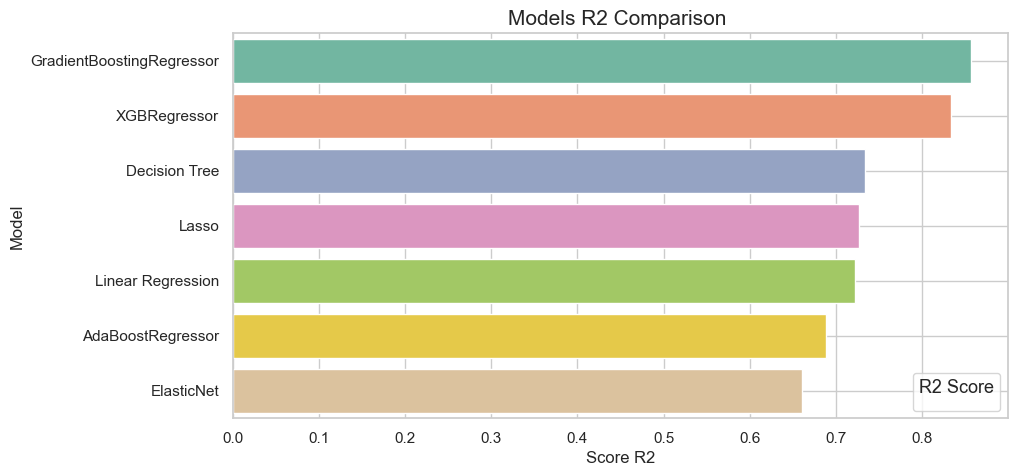

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = {
    'Linear Regression': LR_r2,
    'Decision Tree': DT_r2,
    'AdaBoostRegressor': ada_r2,
    'Lasso':lasso_r2,
    'GradientBoostingRegressor': gradianB_r2,
    'XGBRegressor': xgb_r2,
    'ElasticNet' : EN_r2,
}   

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Score'])

# Sort the results by Score
results_df = results_df.sort_values(by='Score', ascending=False)

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a seaborn barplot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=results_df['Score'], y=results_df['Model'], palette="Set2")

# Add legend
barplot.legend(title='R2 Score', title_fontsize='13', loc='lower right')

# Add grid
plt.grid(True)

# Add labels and title
plt.xlabel('Score R2', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model''s R2 Comparison ', fontsize=15)

# Show the plot
plt.show()


## MSE

C:\Users\lokmane\AppData\Local\Temp\ipykernel_15912\2075405765.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=results_df['Score'], y=results_df['Model'], palette="Dark2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


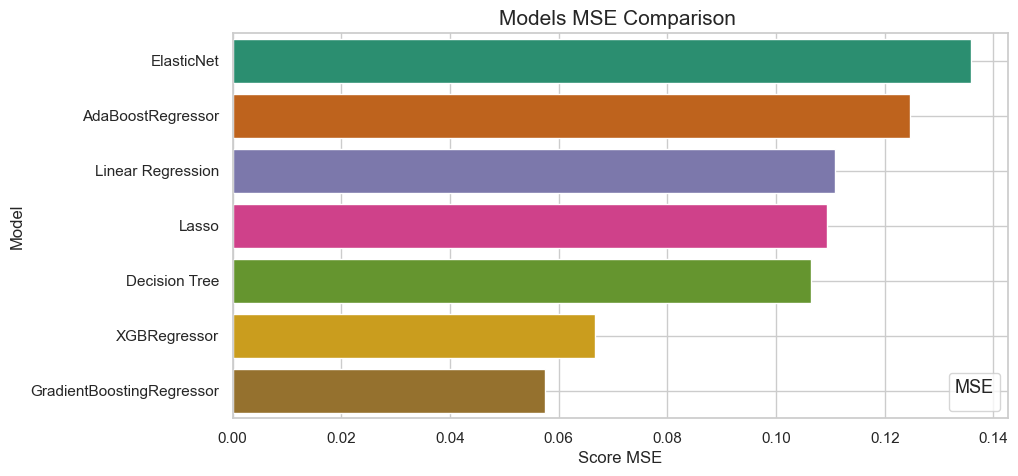

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = {
    'Linear Regression': LR_mse,
    'Decision Tree': DT_mse,
    'AdaBoostRegressor': ada_mse,
    'Lasso':lasso_mse,
    'GradientBoostingRegressor': gradianB_mse,
    'XGBRegressor': xgb_mse,
    'ElasticNet' : EN_mse,
}   

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Score'])

# Sort the results by Score
results_df = results_df.sort_values(by='Score', ascending=False)

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a seaborn barplot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(x=results_df['Score'], y=results_df['Model'], palette="Dark2")

# Add legend
barplot.legend(title='MSE', title_fontsize='13', loc='lower right')

# Add grid
plt.grid(True)

# Add labels and title
plt.xlabel('Score MSE', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model''s MSE Comparison ', fontsize=15)

# Show the plot
plt.show()
